# Geometría Computacional
Gabriel De La Parra

## Introducción
Otra aplicación posible de 

In [1]:
import pdfplumber

In [2]:
pdf = pdfplumber.open("paper1.pdf")
pages = pdf.pages
metadata = pdf.metadata
print("Pages:",len(pages))
print("Metadata:",metadata)

Pages: 264
Metadata: {'ModDate': "D:20040722180735-04'00'", 'CreationDate': "D:20040716103817-04'00'", 'Title': 'Microsoft Word - 20,000 Leagues Under the Sea, Jules Verne', 'Creator': 'Acrobat PDFMaker 6.0 for Word', 'Author': ' Todd Fibus', 'Producer': 'Acrobat Distiller 6.0 (Windows)', 'Company': ' '}


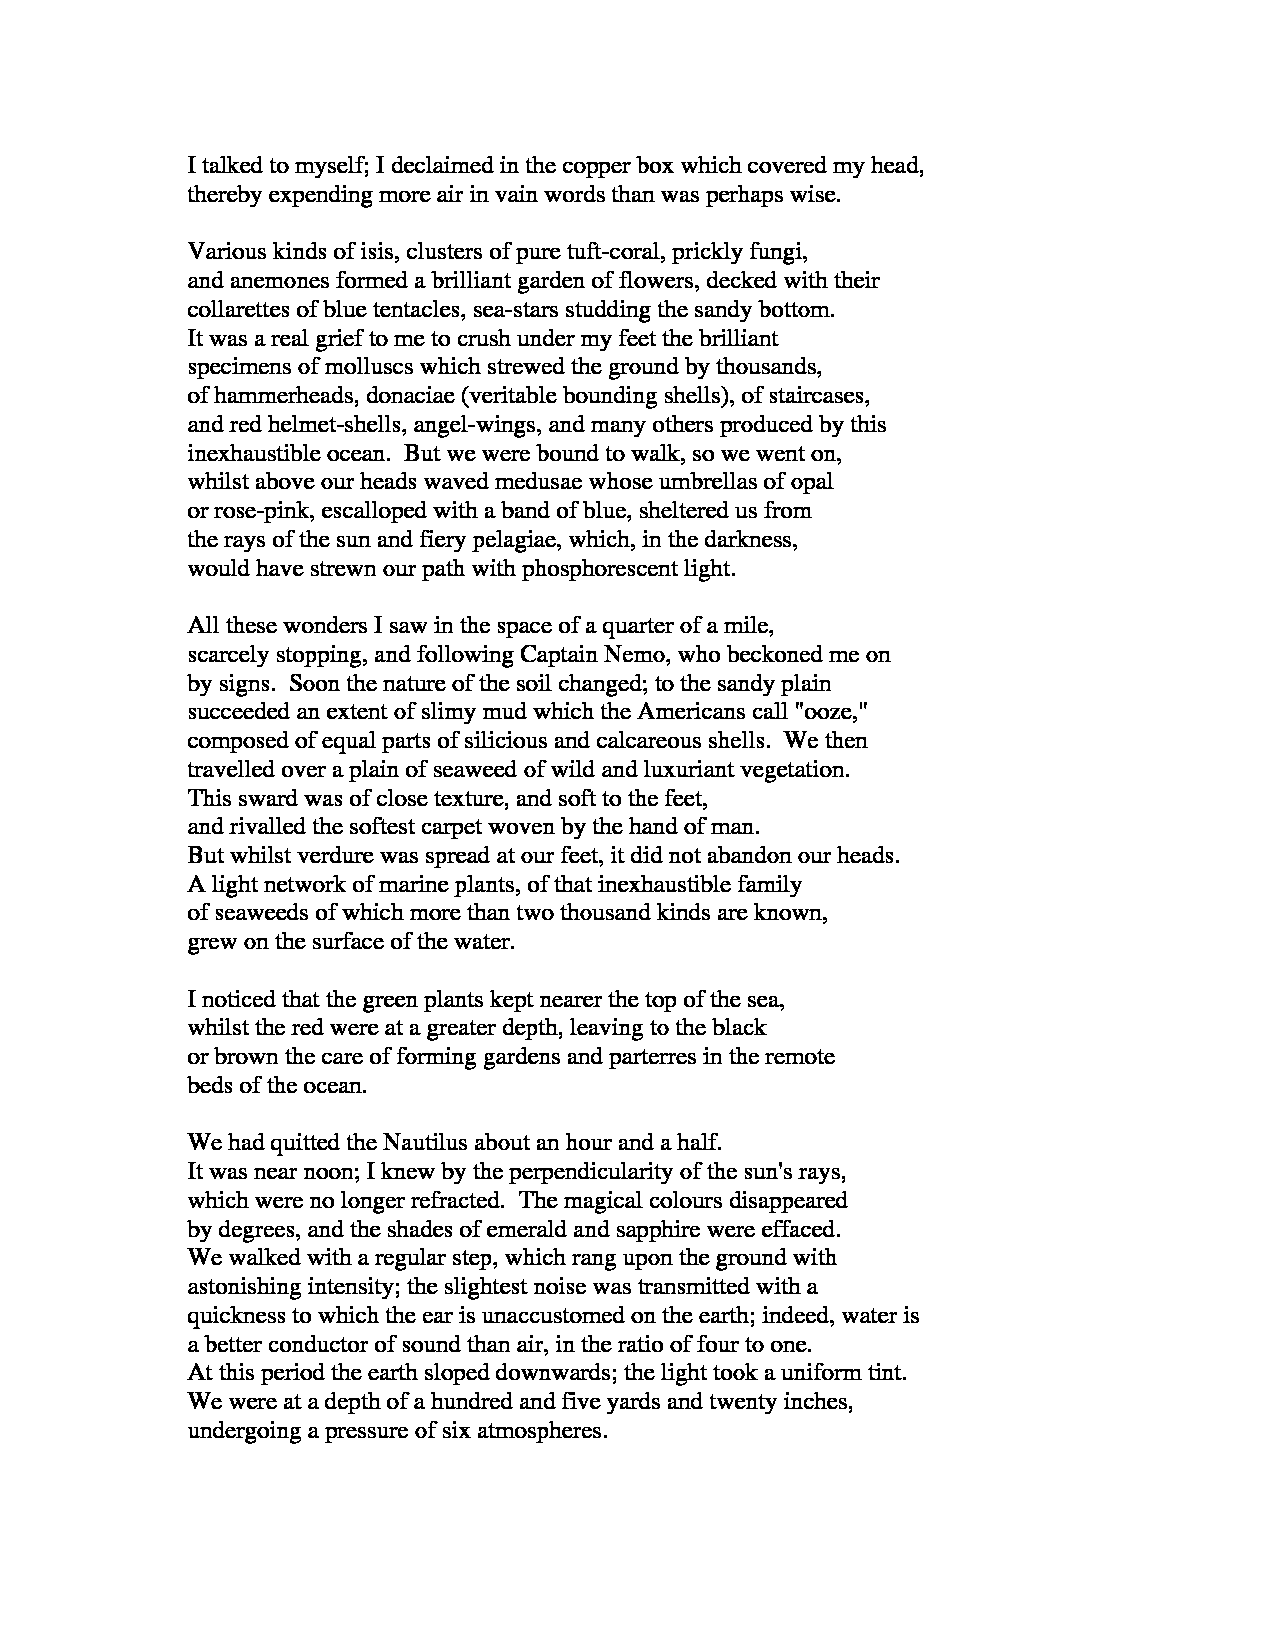

In [3]:
page = pages[76]
page.to_image(resolution = 150)

In [4]:
pageText = page.extract_text()
pageText

'I talked to myself; I declaimed in the copper box which covered my head, \nthereby expending more air in vain words than was perhaps wise. \n \nVarious kinds of isis, clusters of pure tuft-coral, prickly fungi, \nand anemones formed a brilliant garden of flowers, decked with their \ncollarettes of blue tentacles, sea-stars studding the sandy bottom. \nIt was a real grief to me to crush under my feet the brilliant \nspecimens of molluscs which strewed the ground by thousands, \nof hammerheads, donaciae (veritable bounding shells), of staircases, \nand red helmet-shells, angel-wings, and many others produced by this \ninexhaustible ocean.  But we were bound to walk, so we went on, \nwhilst above our heads waved medusae whose umbrellas of opal \nor rose-pink, escalloped with a band of blue, sheltered us from \nthe rays of the sun and fiery pelagiae, which, in the darkness, \nwould have strewn our path with phosphorescent light. \n \nAll these wonders I saw in the space of a quarter of a 

In [5]:
pageWords = page.extract_words()
pageWords[0:5]

[{'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('90.000'),
  'x1': Decimal('93.996')},
 {'bottom': Decimal('85.632'),
  'text': 'talked',
  'top': Decimal('69.864'),
  'x0': Decimal('97.003'),
  'x1': Decimal('126.367')},
 {'bottom': Decimal('85.632'),
  'text': 'to',
  'top': Decimal('69.864'),
  'x0': Decimal('129.374'),
  'x1': Decimal('138.718')},
 {'bottom': Decimal('85.632'),
  'text': 'myself;',
  'top': Decimal('69.864'),
  'x0': Decimal('141.725'),
  'x1': Decimal('177.660')},
 {'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('180.667'),
  'x1': Decimal('184.663')}]

In [6]:
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams["figure.figsize"] = (12,12)

In [7]:
def addPoints(ax, words):
    for word in words:
        ax.plot(word['x0'], word['top'], 'ro')   

def addWords(ax, words):
    for word in words:
        ax.annotate(word['text'],(word['x0'],word['top']))

Page Words 449


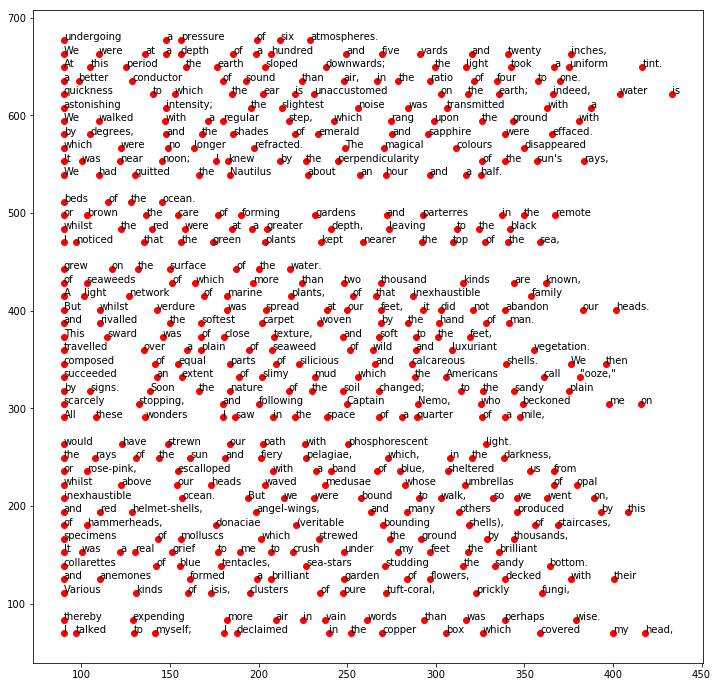

In [8]:
print("Page Words", len(pageWords))
fig, ax = plt.subplots()
addPoints(ax, pageWords)
addWords(ax, pageWords)
plt.plot();

In [9]:
if False:
    import nltk
    nltk.download()

In [10]:
from nltk.corpus import stopwords
stopWords = set(stopwords.words('english'))
list(stopWords)[0:10]

['it', 'll', 'such', 'they', 'when', 'below', 'what', 'isn', 'itself', 'again']

In [11]:
from nltk.tokenize import word_tokenize
import re

In [12]:
def filterSymbols(words):
    for word in words:
        word['text'] = re.sub('[^a-zA-Z]',"", word['text'])
    return words
        
filterSymbols(pageWords)[0:5]

[{'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('90.000'),
  'x1': Decimal('93.996')},
 {'bottom': Decimal('85.632'),
  'text': 'talked',
  'top': Decimal('69.864'),
  'x0': Decimal('97.003'),
  'x1': Decimal('126.367')},
 {'bottom': Decimal('85.632'),
  'text': 'to',
  'top': Decimal('69.864'),
  'x0': Decimal('129.374'),
  'x1': Decimal('138.718')},
 {'bottom': Decimal('85.632'),
  'text': 'myself',
  'top': Decimal('69.864'),
  'x0': Decimal('141.725'),
  'x1': Decimal('177.660')},
 {'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('180.667'),
  'x1': Decimal('184.663')}]

In [13]:
def removeStopWords(words, stopWords):
    return [word for word in words if word['text'] not in stopWords]    

removeStopWords(pageWords, stopWords)[0:5]

[{'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('90.000'),
  'x1': Decimal('93.996')},
 {'bottom': Decimal('85.632'),
  'text': 'talked',
  'top': Decimal('69.864'),
  'x0': Decimal('97.003'),
  'x1': Decimal('126.367')},
 {'bottom': Decimal('85.632'),
  'text': 'I',
  'top': Decimal('69.864'),
  'x0': Decimal('180.667'),
  'x1': Decimal('184.663')},
 {'bottom': Decimal('85.632'),
  'text': 'declaimed',
  'top': Decimal('69.864'),
  'x0': Decimal('187.670'),
  'x1': Decimal('236.954')},
 {'bottom': Decimal('85.632'),
  'text': 'copper',
  'top': Decimal('69.864'),
  'x0': Decimal('269.915'),
  'x1': Decimal('302.603')}]

Page Words 449
Filtered: 253


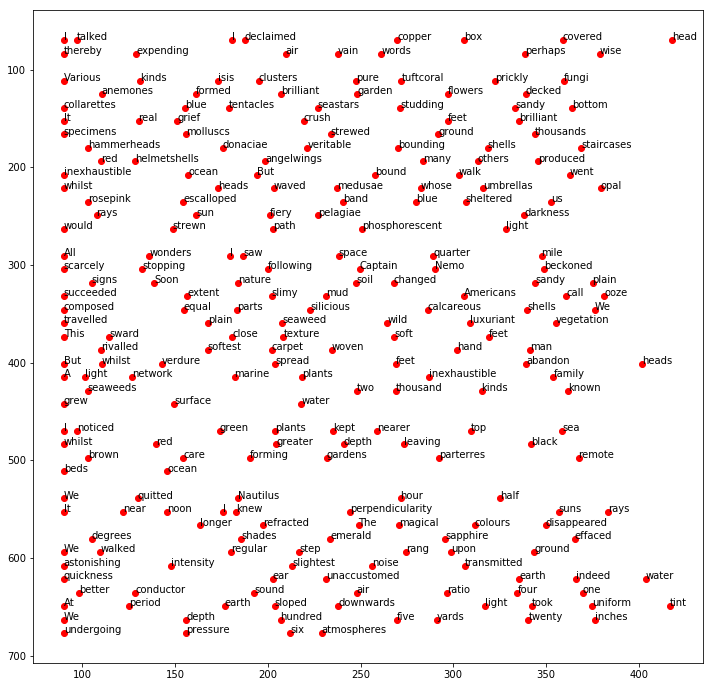

In [56]:
filtered = filterSymbols(pageWords)
noStopWords = removeStopWords(filtered, stopWords)
print("Page Words", len(pageWords))
print("Filtered:",len(noStopWords))
fig, ax = plt.subplots()
addPoints(ax, noStopWords)
addWords(ax, noStopWords)
plt.gca().invert_yaxis()
plt.plot();

In [15]:
def getPoints(words):
    points = []
    for word in words:
        points.append((word['x0'],word['top']))
    return points

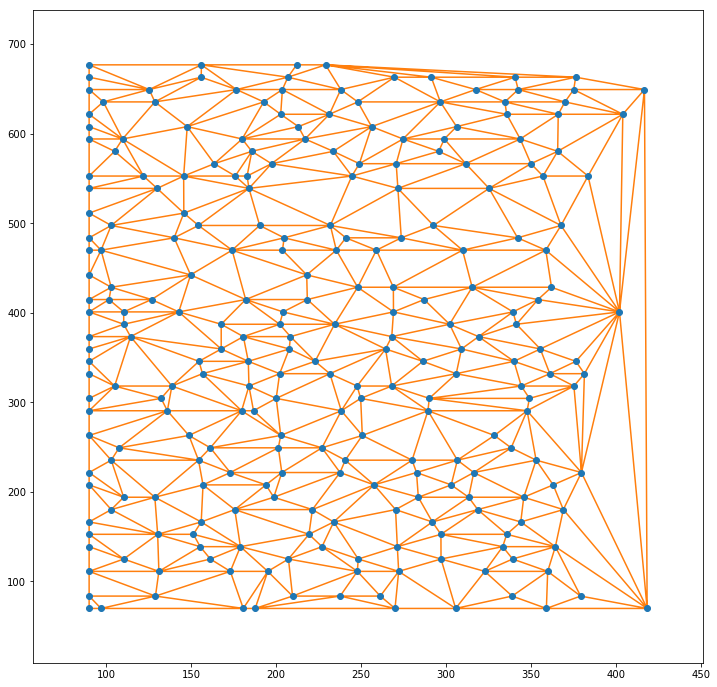

In [57]:
import warnings
warnings.filterwarnings('ignore')

from scipy.spatial import Delaunay, delaunay_plot_2d
points = getPoints(noStopWords)
fig, ax = plt.subplots();
tri = Delaunay(points);
delaunay_plot_2d(tri, ax=ax);

In [43]:
from scipy.spatial import minkowski_distance
X = tri.simplices[:,0]
Y = tri.simplices[:,1]
Z = tri.simplices[:,2]
print(len(X), len(Y), len(Z))
Xvert = [tri.points[x] for x in X]
Yvert = [tri.points[y] for y in Y]
Zvert = [tri.points[z] for z in Z]
print(len(Xvert), len(Yvert), len(Zvert))
lengthsXY = minkowski_distance(Xvert, Yvert)
lengthsXZ = minkowski_distance(Xvert, Zvert)
lengthsYZ = minkowski_distance(Yvert, Zvert)
print(len(lengthsXY), len(lengthsXZ), len(lengthsYZ))

463 463 463
463 463 463
463 463 463


253


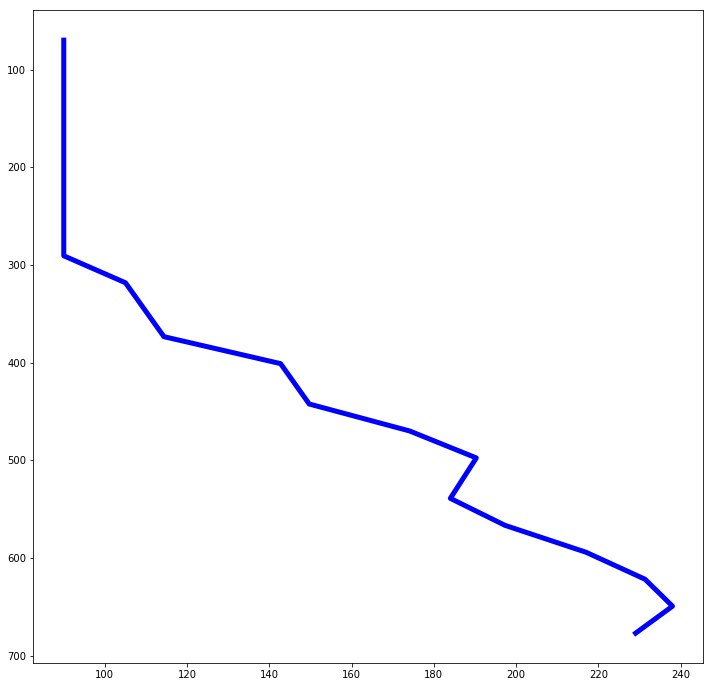

In [62]:
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import shortest_path, johnson

nvert = len(tri.points)
print(nvert)
G = lil_matrix((nvert, nvert))

for k in range(len(X)):
    G[X[k], Y[k]] = G[Y[k], X[k]] = lengthsXY[k]
    G[X[k], Z[k]] = G[Z[k], X[k]] = lengthsXZ[k]
    G[Y[k], Z[k]] = G[Z[k], Y[k]] = lengthsYZ[k]
    
dist_matrix, pred = johnson(G, return_predecessors=True, directed=True, unweighted=False)
index = 0
path = [0]
while index != nvert-1:
    index = pred[nvert-1, index]
    path.append(index)    
    
Xs = [tri.points[x][0] for x in path]
Ys = [tri.points[x][1] for x in path]
plt.figure(figsize=(14,14))
fig, ax = plt.subplots()
ax.plot(Xs, Ys, '-', linewidth=5, color='blue');
plt.gca().invert_yaxis()
plt.show()

253


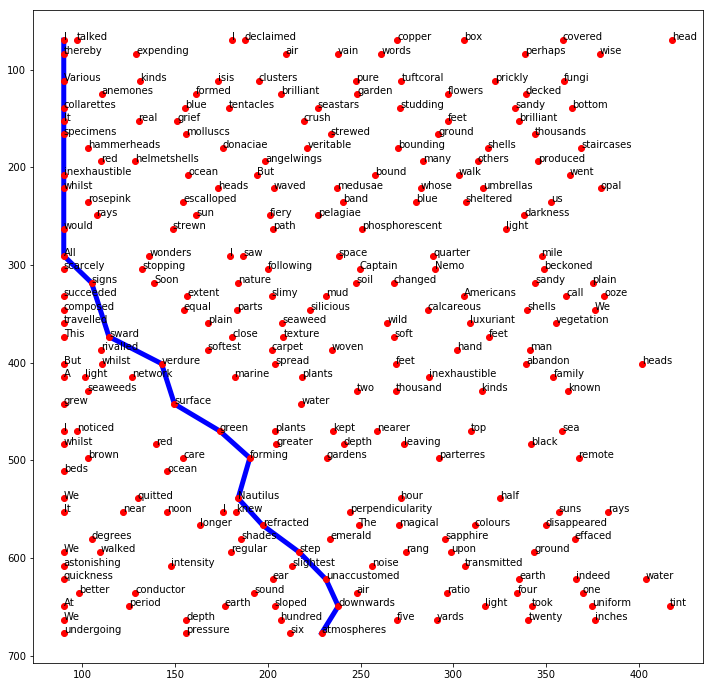

In [64]:
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import shortest_path, johnson

nvert = len(tri.points)
print(nvert)
G = lil_matrix((nvert, nvert))

for k in range(len(X)):
    G[X[k], Y[k]] = G[Y[k], X[k]] = lengthsXY[k]
    G[X[k], Z[k]] = G[Z[k], X[k]] = lengthsXZ[k]
    G[Y[k], Z[k]] = G[Z[k], Y[k]] = lengthsYZ[k]
    
dist_matrix, pred = johnson(G, return_predecessors=True, directed=True, unweighted=False)
index = 0
path = [0]
while index != nvert-1:
    index = pred[nvert-1, index]
    path.append(index)    
    
Xs = [tri.points[x][0] for x in path]
Ys = [tri.points[x][1] for x in path]
plt.figure(figsize=(14,14))
fig, ax = plt.subplots()
ax.plot(Xs, Ys, '-', linewidth=5, color='blue');
plt.gca().invert_yaxis()
addPoints(ax, noStopWords)
addWords(ax, noStopWords)
plt.show()

253


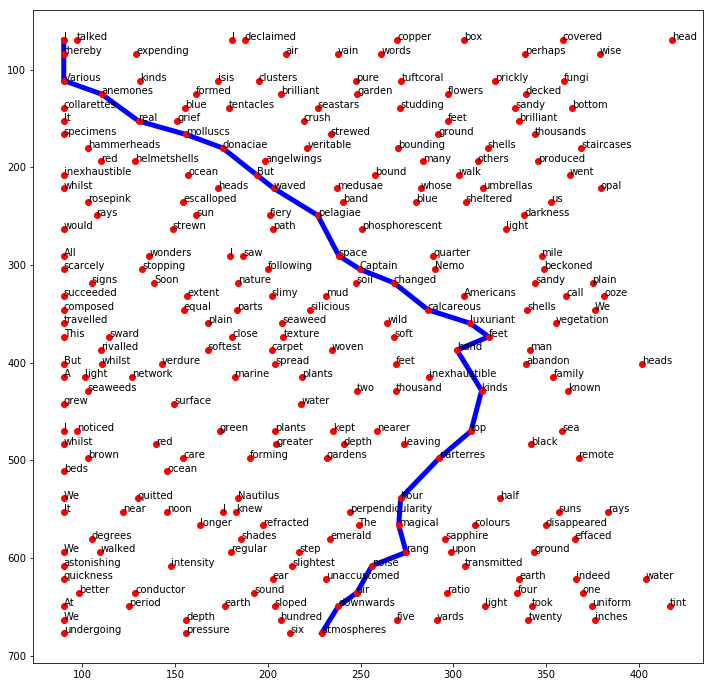

In [65]:
from scipy.sparse import lil_matrix
from scipy.sparse.csgraph import shortest_path, johnson

nvert = len(tri.points)
print(nvert)
G = lil_matrix((nvert, nvert))

for k in range(len(X)):
    G[X[k], Y[k]] = G[Y[k], X[k]] = lengthsXY[k]
    G[X[k], Z[k]] = G[Z[k], X[k]] = lengthsXZ[k]
    G[Y[k], Z[k]] = G[Z[k], Y[k]] = lengthsYZ[k]
    
dist_matrix, pred = johnson(G, return_predecessors=True, directed=True, unweighted=False)
index = 0
path = [0]
while index != 133:
    index = pred[133, index]
    path.append(index)
while index != nvert-1:
    index = pred[nvert-1, index]
    path.append(index)    
    
Xs = [tri.points[x][0] for x in path]
Ys = [tri.points[x][1] for x in path]
plt.figure(figsize=(14,14))
fig, ax = plt.subplots()
ax.plot(Xs, Ys, '-', linewidth=5, color='blue');
plt.gca().invert_yaxis()
addPoints(ax, noStopWords)
addWords(ax, noStopWords)
plt.show()